<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.4
# *PCA Lab*

**In this lab, we will:**
- Explore how PCA is related to correlation.
- Use PCA to perform dimensionality reduction.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [7]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
breast_cancer_csv = r'C:\Users\ryant\Desktop\IOD\DATA\breast-cancer-wisconsin-data.csv'
bc = pd.read_csv(breast_cancer_csv, index_col = 0)
bc

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN


### 2. EDA

Explore dataset. Clean data. Find correlation.

In [14]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

In [17]:
bc = bc.drop('Unnamed: 32', axis=1) #drop the last column with null values

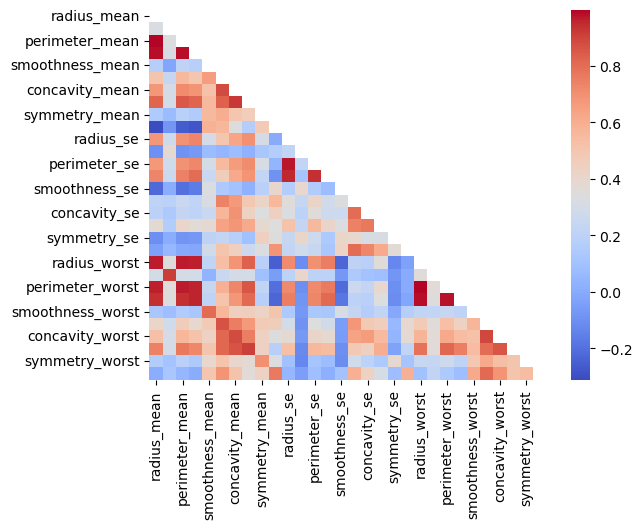

In [22]:
#heatmap of the numeric datatypes only
bc_corr = bc.select_dtypes(include='number').corr()
sns.heatmap(data=bc_corr,
            cmap='coolwarm',
            mask=np.triu(np.ones_like(bc_corr, dtype=bool)) 
           )
plt.show()

### 3. Subset & Normalise

Subset the data to only include all columns except diagnosis, then apply StandardScaler.

In [69]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [30]:
bc.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [59]:
X = bc.drop('diagnosis', axis = 1) #dropped diagnosis column and included all other columns
y = bc['diagnosis'] #target column

In [61]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [73]:
Xss = ss.fit_transform(X)

In [75]:
Xss

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

### Calculate correlation matrix

We will be using the correlation matrix to calculate the eigenvectors and eigenvalues.

In [93]:
bc.columns.drop('diagnosis')

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [95]:
pd.DataFrame(data = Xss, columns = bc.columns.drop('diagnosis'))

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [101]:
#correlation matrix of Normalised dataframe X
Xcormat = pd.DataFrame(data = Xss, columns = bc.columns.drop('diagnosis')).corr()
Xcormat

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


### 4. Calculate the eigenvalues and eigenvectors from the correlation matrix

numpy has a convenient function to calculate this:

    eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)

In [103]:
eigenval, eigenvect = np.linalg.eig(Xcormat)

In [124]:
eigenval

array([1.32816077e+01, 5.69135461e+00, 2.81794898e+00, 1.98064047e+00,
       1.64873055e+00, 1.20735661e+00, 6.75220114e-01, 4.76617140e-01,
       4.16894812e-01, 3.50693457e-01, 2.93915696e-01, 2.61161370e-01,
       2.41357496e-01, 1.57009724e-01, 9.41349650e-02, 7.98628010e-02,
       5.93990378e-02, 5.26187835e-02, 4.94775918e-02, 1.33044823e-04,
       7.48803097e-04, 1.58933787e-03, 6.90046388e-03, 8.17763986e-03,
       1.54812714e-02, 1.80550070e-02, 2.43408378e-02, 2.74394025e-02,
       3.11594025e-02, 2.99728939e-02])

In [126]:
eigenvect[0]

array([ 0.21890244, -0.23385713, -0.00853124,  0.04140896, -0.03778635,
        0.01874079,  0.12408834,  0.0074523 , -0.22310976,  0.09548644,
        0.04147149,  0.05106746,  0.01196721, -0.05950613, -0.05111877,
        0.15058388, -0.20292425, -0.14671234, -0.22538466, -0.70241409,
        0.21146046, -0.21119401, -0.13152667,  0.1294764 ,  0.0192265 ,
       -0.18257944,  0.09855269, -0.0729289 , -0.04969866,  0.06857001])

### 5. Calculate and plot the explained variance

A useful measure is the **explained variance**, which is calculated from the eigenvalues.

The explained variance tells us how much information (variance) is captured by each principal component.

### $$ ExpVar_i = \bigg(\frac{eigenvalue_i}{\sum_j^n{eigenvalue_j}}\bigg) * 100$$

In [165]:
def calculate_cum_var_exp(eig_vals):
    '''
    Calculate Explained Variance from Eigenvalues
    
    Return a list or array containing the cumulative explained variance
    '''
    denominator = sum(eig_vals)
    exp_vari = []
    for i in eig_vals:
        formula = (i / denominator)*100
        exp_vari.append(formula)
    cum_var_exp = np.cumsum(exp_vari)
    return cum_var_exp

In [167]:
def plot_var_exp(eig_vals):

    cum_var_exp = calculate_cum_var_exp(eig_vals)

    plt.figure(figsize=(9,7))

    component_number = [i+1 for i in range(len(cum_var_exp))]

    plt.plot(component_number, cum_var_exp, lw=7)

    plt.axhline(y=0, linewidth=5, color='grey', ls='dashed')
    plt.axhline(y=100, linewidth=3, color='grey', ls='dashed')

    ax = plt.gca()
    ax.set_xlim([1,30])
    ax.set_ylim([-5,105])

    ax.set_ylabel('cumulative variance explained', fontsize=16)
    ax.set_xlabel('component', fontsize=16)

    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(12)

    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(12)

    ax.set_title('component vs cumulative variance explained\n', fontsize=20)

    plt.show()

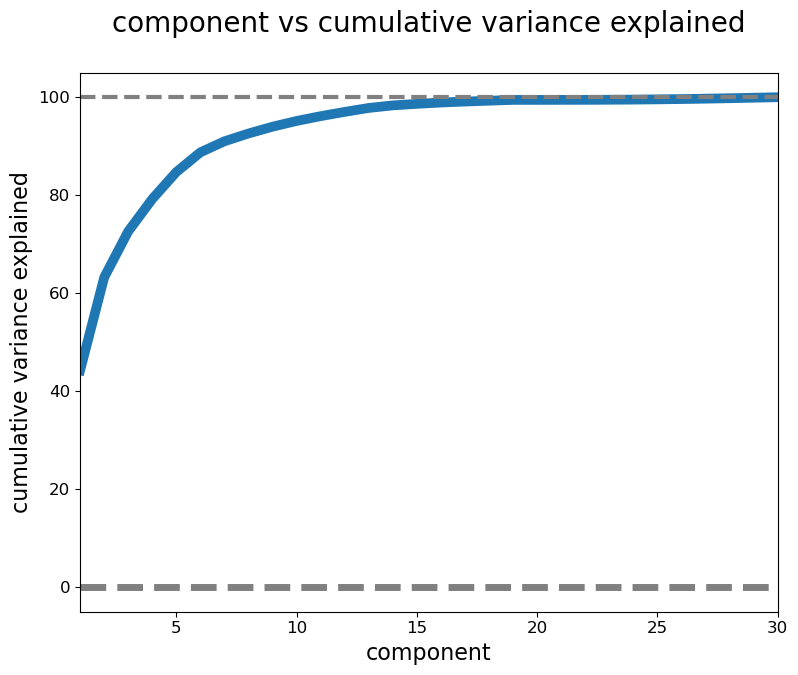

In [171]:
plot_var_exp(eigenval)

### 6. Using sklearn For PCA

    from sklearn.decomposition import PCA
    
- Create an instance of PCA
    - Fit X
- Plot the cumulative explained variance
- Apply dimensionality reduction to X with n_components=16
    - Fit and transform X
- Create a pairplot of PCA-transformed data

In [176]:
from sklearn.decomposition import PCA
pca = PCA()

In [186]:
# Create an instance of PCA (do not set n_components)
pca 
# Fit Xs (breast cancer dataset having standardised features)
pca.fit(Xss)
eigenval_pca = pca.explained_variance_

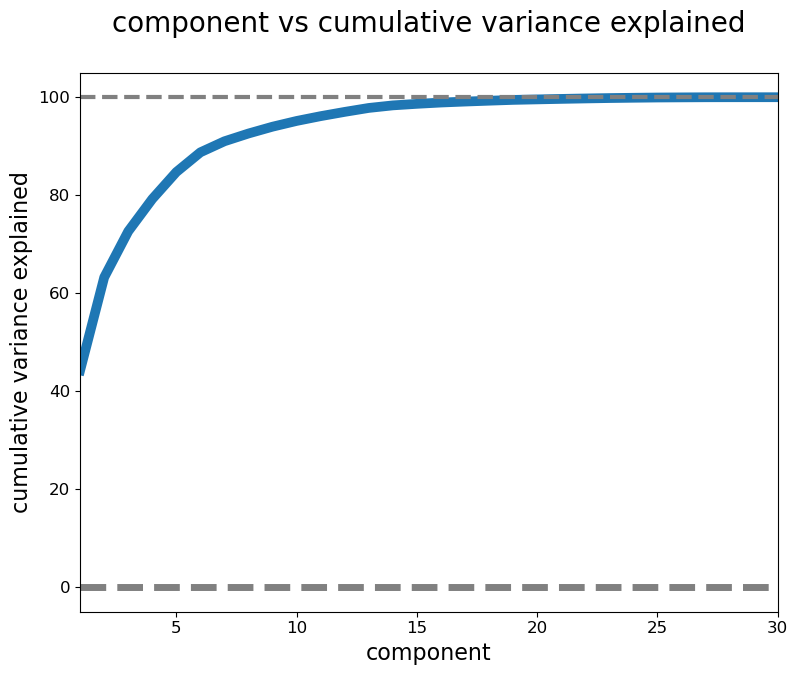

In [190]:
# ANSWER
# Plot cumulative variance explained vs number of components using the plot_var_exp function from above
plot_var_exp(eigenval_pca)

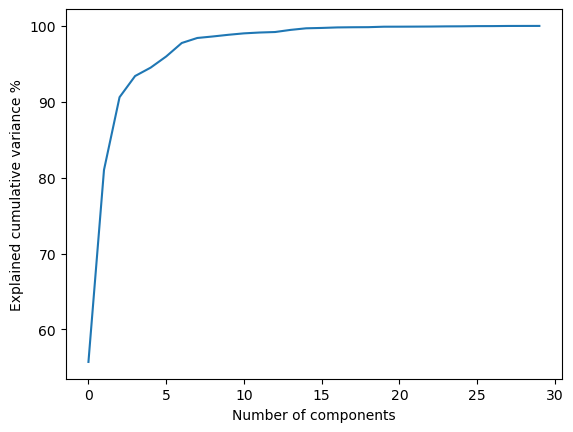

In [199]:
plt.plot (100 - (100*pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained cumulative variance %')
plt.show()

In [211]:
# ANSWER
# Create another instance of PCA (this time with n_components = 16)
pca_n = PCA(n_components=16)
# Fit and transform Xs (breast cancer dataset having standardised features)
pca_n.fit(Xss)
Xss_pca = pca_n.transform(Xss)

In [220]:
Xss_pca

array([[ 9.19283683e+00,  1.94858307e+00, -1.12316616e+00, ...,
        -6.90804097e-01,  6.01793127e-01, -7.45115792e-01],
       [ 2.38780180e+00, -3.76817174e+00, -5.29292687e-01, ...,
        -6.53475327e-01, -8.97486713e-03,  6.48808694e-01],
       [ 5.73389628e+00, -1.07517380e+00, -5.51747593e-01, ...,
         1.66797587e-02, -4.83419744e-01, -3.25110527e-01],
       ...,
       [ 1.25617928e+00, -1.90229671e+00,  5.62730526e-01, ...,
         2.85690875e-01, -9.09977705e-02,  2.32648464e-01],
       [ 1.03747941e+01,  1.67201011e+00, -1.87702933e+00, ...,
         2.18697665e-01, -2.29591034e-01,  6.10468376e-02],
       [-5.47524330e+00, -6.70636791e-01,  1.49044308e+00, ...,
        -1.17072466e+00, -2.17343343e-01, -9.21287617e-01]])

In [224]:
pd.DataFrame(Xss_pca).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,9.192837,1.948583,-1.123166,-3.633731,1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,0.262955,0.859014,-0.103388,-0.690804,0.601793,-0.745116
1,2.387802,-3.768172,-0.529293,-1.118264,-0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,0.813120,-0.157923,0.943529,-0.653475,-0.008975,0.648809
2,5.733896,-1.075174,-0.551748,-0.912083,0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,-0.605604,-0.124387,0.410627,0.016680,-0.483420,-0.325111
3,7.122953,10.275589,-3.232790,-0.152547,2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,-1.151514,-1.011316,0.933271,-0.487417,0.168848,-0.051370
4,3.935302,-1.948072,1.389767,-2.940639,-0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,0.651360,0.110515,-0.387948,-0.539181,-0.310319,0.152606


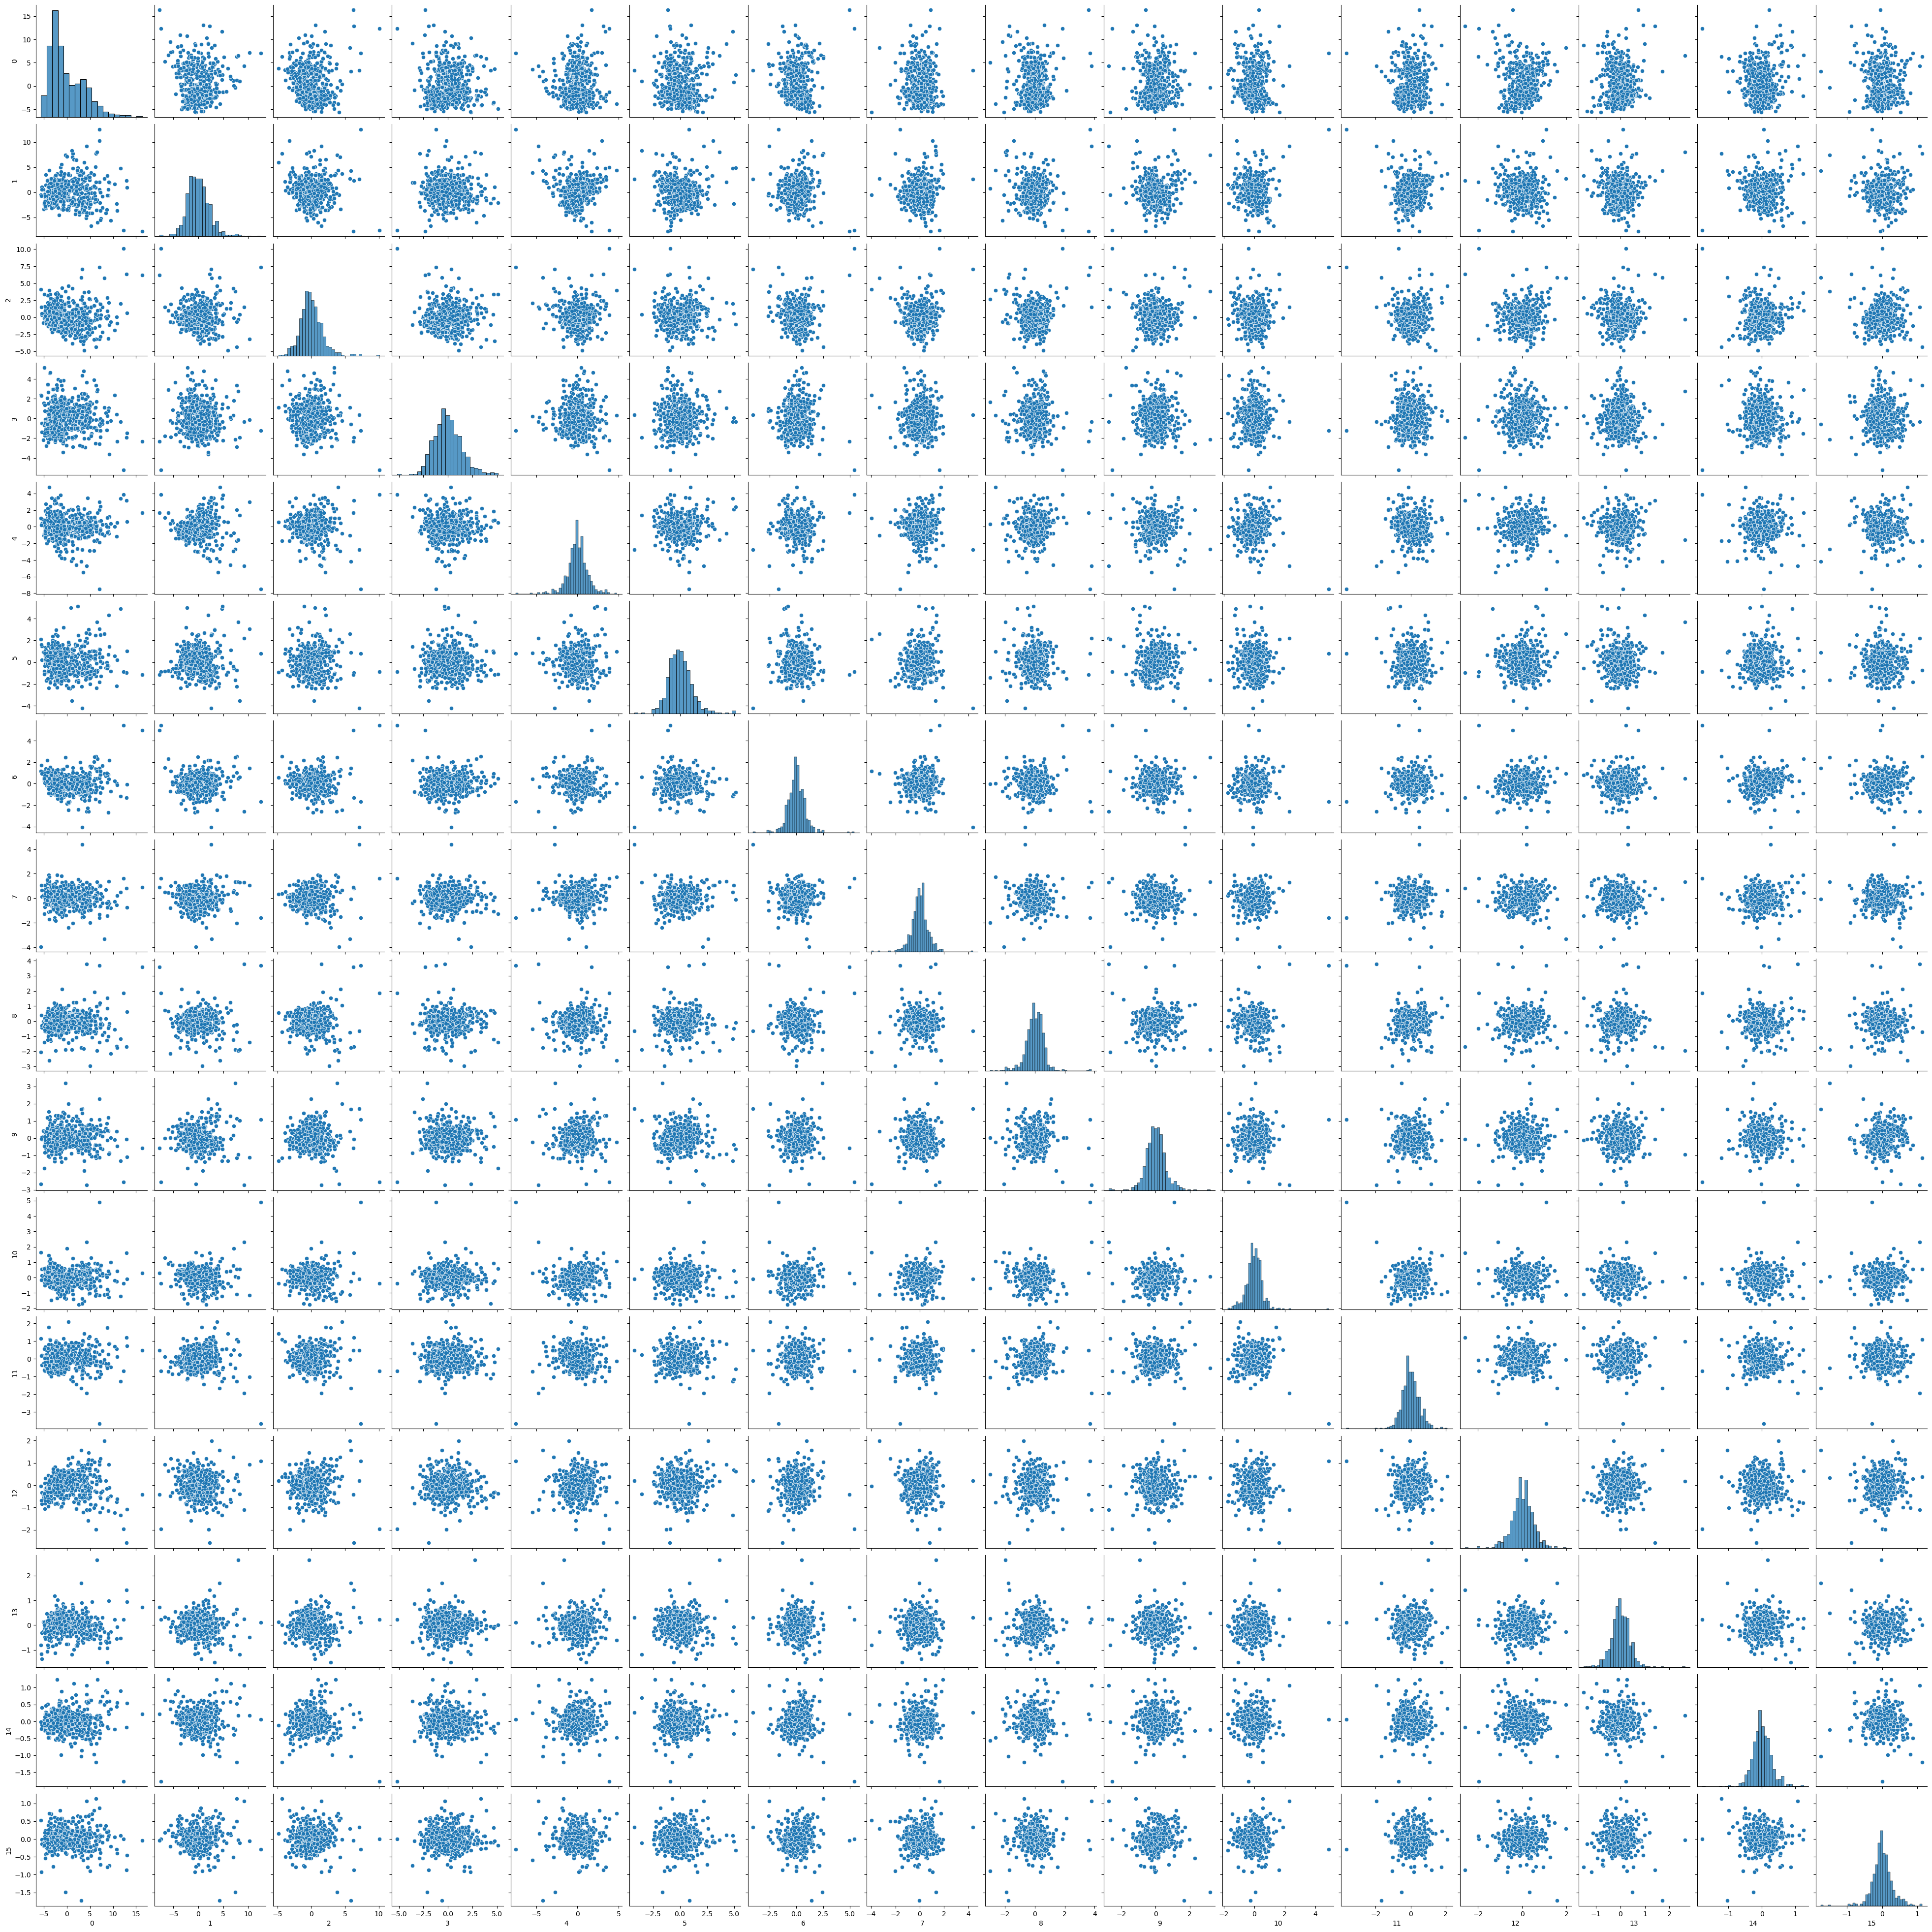

In [223]:
# ANSWER
# Create a pairplot of PCA-transformed data
sns.pairplot(pd.DataFrame(Xss_pca))
plt.show()

You should notice that the transformed features have been decorrelated (neither increasing nor decreasing trends in pairs of variables).

### 7. Split Data to 80/20 and use PCA prior to a supervised learning task

In this section we use PCA as a preprocessing step to a supervised learning algorithm.

In [227]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

Split the original dataset 80/20. Then apply standard scaler followed by PCA.

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply standard scaler to X_train and X_test (fit_transform on X_train, transform on X_test):
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

# Instantiate the PCA class and set at 16 components
bc_pca = PCA(n_components=16)
# Apply PCA to the standardised features
X_train_scaled_pca = bc_pca.fit_transform(X_train_scaled)
X_test_scaled_pca = bc_pca.transform(X_test_scaled)

Apply a KNN algorithm on `X_train_scaled` and `X_train_scaled_pca` with 5 neighbours, then evaluate using `X_test_scaled` and `X_test_scaled_pca`. Has performance been impacted as a result of dimension reduction?

In [239]:
# Set KNN classifier to use 5 neighbours and fit to X_train_scaled
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train_scaled, y_train)

# Test accuracy of KNN using standardised data
knn5.score(X_test_scaled, y_test)

0.9473684210526315

In [241]:
# Set KNN classifier to use 5 neighbours and fit to X_train_scaled_pca
knn5.fit(X_train_scaled_pca, y_train)

# Test accuracy of KNN using standardised PCA-transformed data
knn5.score(X_test_scaled_pca, y_test)

0.956140350877193

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Breast Cancer Machine Learning Prediction](https://gtraskas.github.io/post/breast_cancer/)

[Understanding PCA (Principal Component Analysis) with Python](https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21)



---



---



> > > > > > > > > © 2025 Institute of Data


---



---



